# Introduction to Python Imaging Library(PIL)

# Exercise - 1:

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Read and display the image

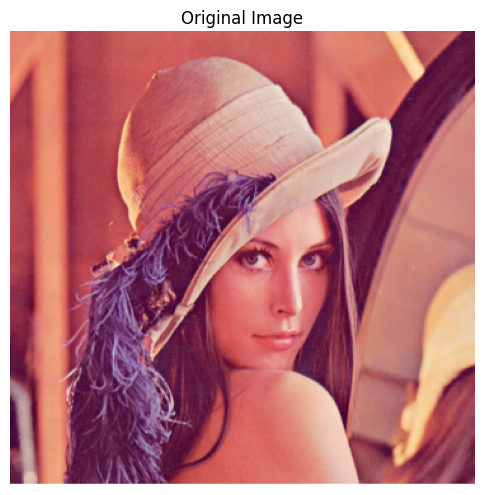

In [3]:
image = Image.open("/content/drive/MyDrive/AI and machine learning/lenna_image.png")
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

In [4]:
# Convert image to NumPy array
image_array = np.array(image)

# 2. Display only the top left corner of 100x100 pixels

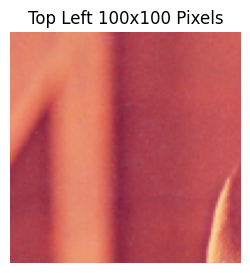

In [5]:
top_left_corner = image_array[:100, :100]
plt.figure(figsize=(3, 3))
plt.imshow(top_left_corner)
plt.title("Top Left 100x100 Pixels")
plt.axis("off")
plt.show()

# 3. Show the three color channels (R, G, B)

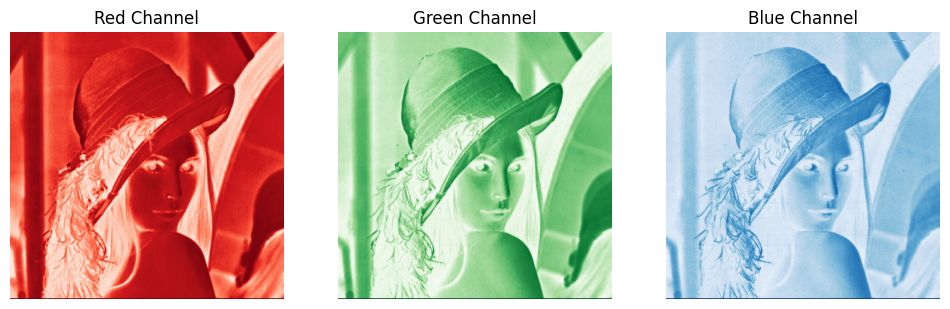

In [6]:
red_channel = image_array[:, :, 0]
green_channel = image_array[:, :, 1]
blue_channel = image_array[:, :, 2]

plt.figure(figsize=(12, 4))
for i, (channel, cmap, title) in enumerate(zip([red_channel, green_channel, blue_channel],
                                               ["Reds", "Greens", "Blues"],
                                               ["Red Channel", "Green Channel", "Blue Channel"])):
    plt.subplot(1, 3, i + 1)
    plt.imshow(channel, cmap=cmap)
    plt.title(title)
    plt.axis("off")
plt.show()

# 4. Modify the top 100 × 100 pixels to a value of 210 (light gray)

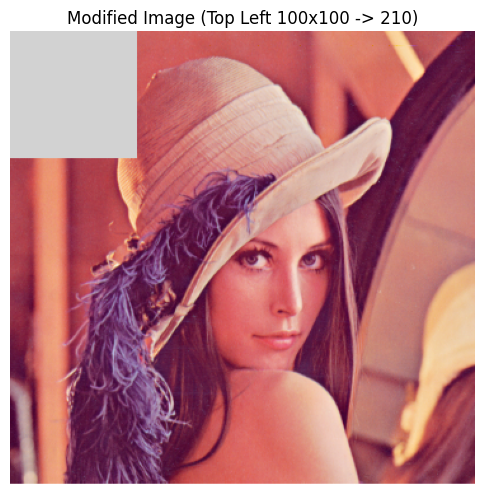

In [7]:
import numpy as np
import matplotlib.pyplot as plt


# Copy the original image before modifying
modified_image = image_array.copy()

# Modify the top-left 100x100 pixels based on image type (RGB or RGBA)
if modified_image.shape[2] == 4:  # RGBA image (has alpha channel)
    modified_image[:100, :100] = [210, 210, 210, 255]  # Gray + Fully Opaque
else:  # RGB image (no alpha channel)
    modified_image[:100, :100] = [210, 210, 210]  # Gray (RGB)

# Display the modified image
plt.figure(figsize=(6, 6))
plt.imshow(modified_image)
plt.title("Modified Image (Top Left 100x100 -> 210)")
plt.axis("off")
plt.show()


# Exercise - 2:

# 1. Load and display a grayscale image

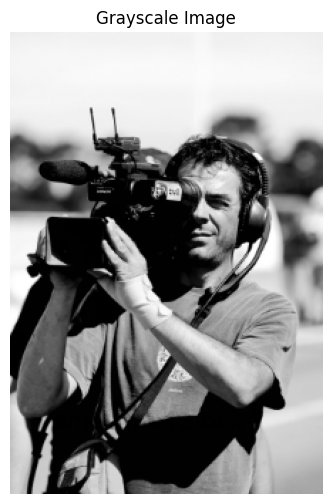

In [9]:
image = Image.open("/content/drive/MyDrive/AI and machine learning/camera_man.jpg").convert("L")  # Convert to grayscale
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

In [10]:
# Convert image to NumPy array
gray_array = np.array(image)
height, width = gray_array.shape

# 2. Extract and display the middle section of the image (150 pixels)

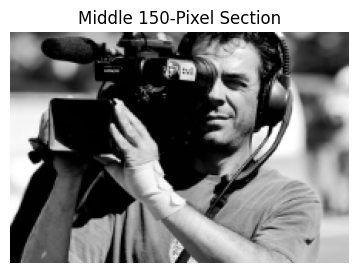

In [11]:
middle_section = gray_array[height//2 - 75:height//2 + 75, :]
plt.figure(figsize=(6, 3))
plt.imshow(middle_section, cmap="gray")
plt.title("Middle 150-Pixel Section")
plt.axis("off")
plt.show()

# 3. Apply a simple threshold to the image (binary conversion)

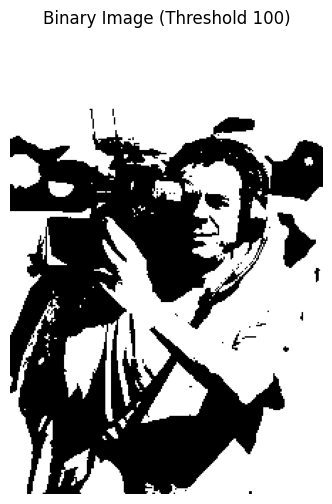

In [12]:
binary_image = np.where(gray_array < 100, 0, 255)
plt.figure(figsize=(6, 6))
plt.imshow(binary_image, cmap="gray")
plt.title("Binary Image (Threshold 100)")
plt.axis("off")
plt.show()

# 4. Rotate the image 90 degrees clockwise

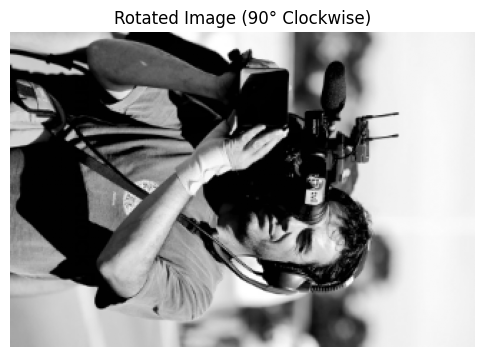

In [13]:
rotated_image = np.rot90(gray_array, k=3)  # Rotate 90 degrees clockwise
plt.figure(figsize=(6, 6))
plt.imshow(rotated_image, cmap="gray")
plt.title("Rotated Image (90° Clockwise)")
plt.axis("off")
plt.show()

# 5. Convert the grayscale image to an RGB image

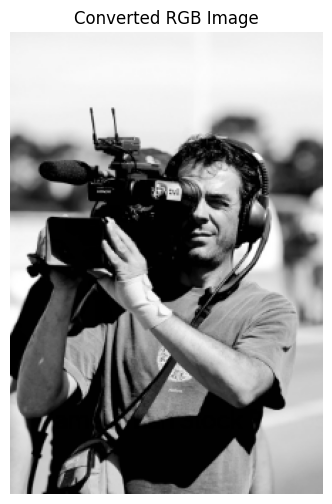

In [14]:
rgb_image = np.stack([gray_array] * 3, axis=-1)  # Replicate grayscale values across R, G, B
plt.figure(figsize=(6, 6))
plt.imshow(rgb_image)
plt.title("Converted RGB Image")
plt.axis("off")
plt.show()

# 3 Image Compression and Decompression using PCA.

# Convert image to grayscale

In [16]:
gray_image = Image.open("/content/drive/MyDrive/AI and machine learning/lenna_image.png").convert("L")
gray_array = np.array(gray_image, dtype=np.float32)

# Center the dataset - Standardize the Data

In [17]:
mean_pixel = np.mean(gray_array)
standardized_data = gray_array - mean_pixel

# Calculate the covariance matrix

In [18]:
cov_matrix = np.cov(standardized_data, rowvar=False)

# Eigen Decomposition and Identifying Principal Components

In [19]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order

In [20]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Identify the Principal Components with cumulative sum plot

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


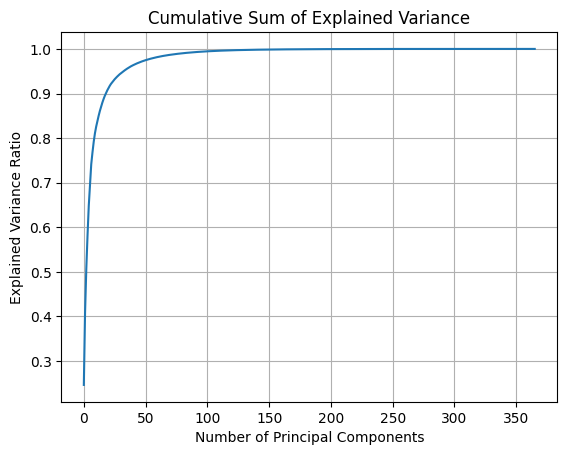

In [21]:
cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)
plt.plot(cumulative_variance)
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Cumulative Sum of Explained Variance")
plt.grid()
plt.show()

# Reconstruction and Evaluation

In [22]:
def reconstruct_image(k):
    top_k_eigenvectors = eigenvectors[:, :k]
    reduced_data = np.dot(standardized_data, top_k_eigenvectors)
    reconstructed_data = np.dot(reduced_data, top_k_eigenvectors.T) + mean_pixel
    return np.clip(reconstructed_data, 0, 255)

# Experimenting with different principal components

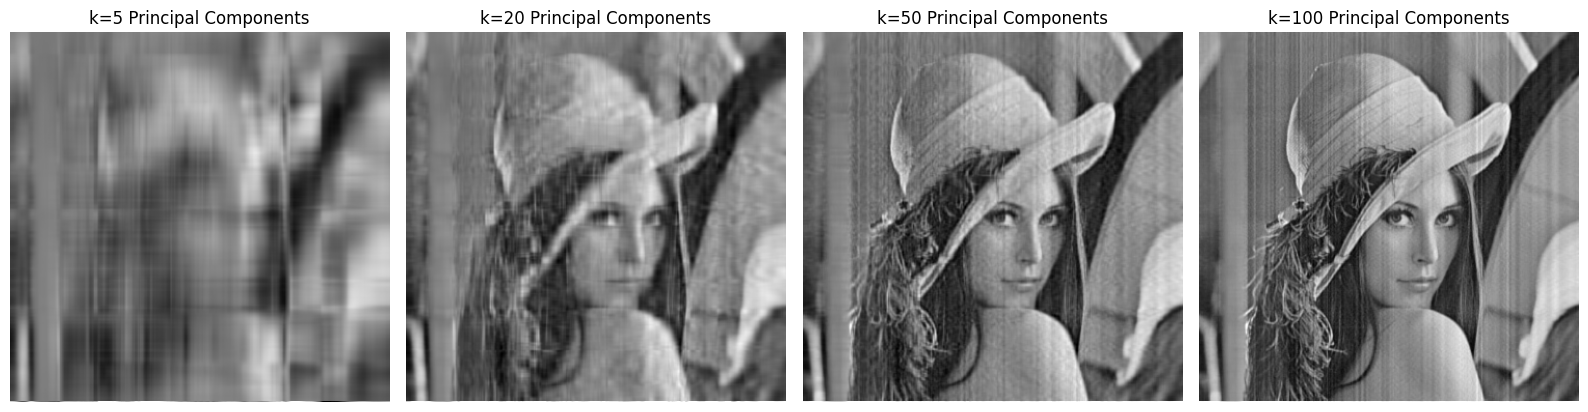

In [23]:
plt.figure(figsize=(16, 4))
k_values = [5, 20, 50, 100]

for i, k in enumerate(k_values):
    reconstructed = reconstruct_image(k)

    # Ensure real-valued data and clip to valid range
    reconstructed = np.real(reconstructed)
    reconstructed = np.clip(reconstructed, 0, 255).astype(np.uint8)

    plt.subplot(1, 4, i + 1)
    plt.imshow(reconstructed, cmap="gray")
    plt.title(f"k={k} Principal Components")
    plt.axis("off")

plt.tight_layout()
plt.show()